In [1]:
# 📊 EDA: Retail Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add additional time features
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Summary stats
df.describe()


,Quantity,Price,Customer ID,TotalPrice,Hour
count,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478,19.994081,12.882400
std,101.220424,71.131797,1680.811316,99.915863,2.316916
min,-9360.000000,0.000000,12346.000000,-25111.090000,7.000000
25%,2.000000,1.250000,13983.000000,4.250000,11.000000
50%,4.000000,1.950000,15311.000000,11.250000,13.000000
75%,12.000000,3.750000,16799.000000,19.350000,14.000000
max,19152.000000,25111.090000,18287.000000,15818.400000,21.000000


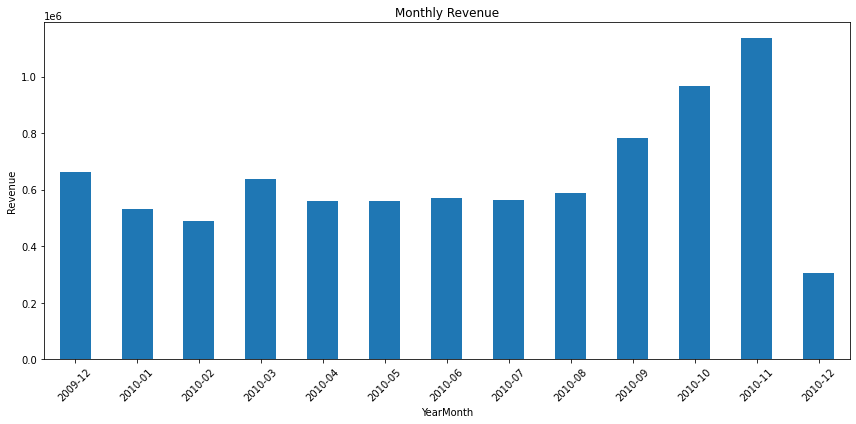

In [2]:
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()
monthly_revenue.plot(kind='bar', figsize=(12, 6), title='Monthly Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


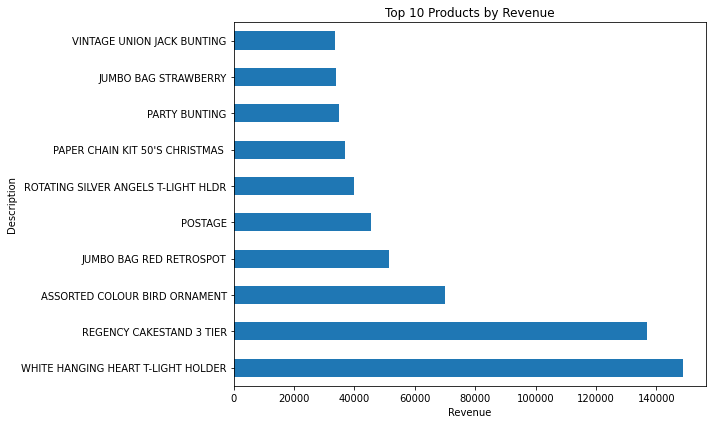

In [3]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Revenue', figsize=(10, 6))
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()


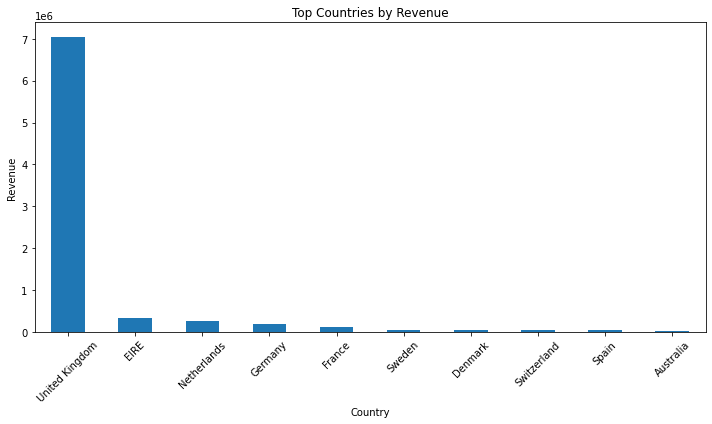

In [4]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', title='Top Countries by Revenue', figsize=(10, 6))
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
